<a href="https://colab.research.google.com/github/danqiye1/rl-agents/blob/master/Simulation/MountainCar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Setup Colab Environment with experiment requirements
!pip install gym tqdm telegram-send

In [ ]:
!telegram-send --configure

In [ ]:
# Install agents
!git clone https://github.com/danqiye1/rl-agents.git
%cd rl-agents
!pip install .

In [4]:
"""
Experiments for MountainCar
"""
import gym
import telegram_send
import numpy as np
from tqdm import tqdm
from matplotlib import pyplot as plt
from MountainCar.agents import QLearningAgent, TDLambdaAgent
from AgentUtils.plots import plot_running_avg

In [5]:
env = gym.make("MountainCar-v0")
agent = QLearningAgent(env, use_sklearn=True)

In [6]:
N = 1000
total_rewards = np.empty(N)
for n in tqdm(range(N)):
    # There are 3 different kinds of epsilon to try
    #eps = 1.0/np.sqrt(n+1)
    #eps = 0.3
    eps = 0.1*(0.97**n)
    total_reward = agent.play(epsilon=eps, env=env, gamma=0.99)
    total_rewards[n] = total_reward
    # if (n + 1) % 100 == 0:
    #     telegram_send.send(messages=["episode: {}, total reward: {}".format(n, total_reward)])

avgReward = total_rewards[-100:].mean()
totalsteps = -total_rewards.sum()
telegram_send.send(messages=[
    "Agent training complete! Please check your plots.",
    "Average reward for last 100 episodes: {}.".format(avgReward),
    "Total steps: {}".format(totalsteps)
])

100%|██████████| 1000/1000 [10:17<00:00,  1.62it/s]


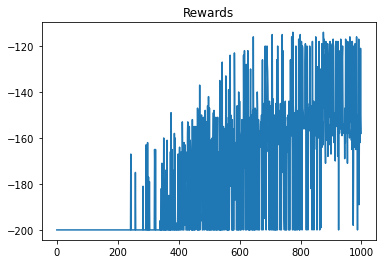

In [7]:
# Sanity check on training
plt.plot(total_rewards)
plt.title("Rewards")
plt.show()

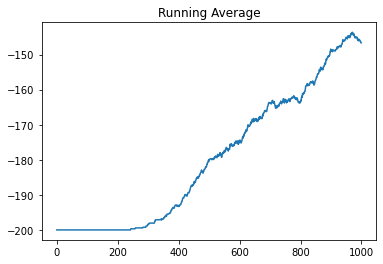

In [8]:
plot_running_avg(total_rewards)